# Tarea 1

**Nombre:** José Ignacio Muñoz Barraza

**Variables**

Las variables tienen la siguiente descripcion:

- Date: data medida en frecuencia diaria
- Location: ubicacion del medidor
- Min_Temp: temperatura minima observada
- Max_Temp: temperatura maxima observada
- Leakage: Filtracion medida en el area
- Evaporation: Tasa de evaporacion
- Electricity: Consumo electrico KW
- Parameter#: Diferentes sensores de reportando direccion y velocidad de viento en distintos momentos del dia, asi como otras metricas relevantes.

**Data:** machine_failure_data.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Pregunta 1

In [2]:
# lectura de data
df = pd.read_csv("machine_failure_data.csv")

print('------------ PRIMERAS FILAS ------------')
print(df.head())

------------ PRIMERAS FILAS ------------
        Date  Location  Min_Temp  Max_Temp  Leakage  Evaporation  Electricity  \
0  12/1/2008         3      13.4      22.9      0.6          NaN          NaN   
1  12/2/2008         3       7.4      25.1      0.0          NaN          NaN   
2  12/3/2008         3      12.9      25.7      0.0          NaN          NaN   
3  12/4/2008         3       9.2      28.0      0.0          NaN          NaN   
4  12/5/2008         3      17.5      32.3      1.0          NaN          NaN   

  Parameter1_Dir  Parameter1_Speed Parameter2_9am  ... Parameter3_3pm  \
0              W              44.0              W  ...           24.0   
1            WNW              44.0            NNW  ...           22.0   
2            WSW              46.0              W  ...           26.0   
3             NE              24.0             SE  ...            9.0   
4              W              41.0            ENE  ...           20.0   

   Parameter4_9am  Parameter4_3pm

In [3]:
# Cantidad de parámetros, columnas, aquí ya muestra el dtype
print('---- INFORMACIÓN (PARÁMETROS) ----') 
print(df.info())         

# Datos faltantes
print('---- INFORMACIÓN (PARÁMETROS) ----')
df.isnull().sum()

---- INFORMACIÓN (PARÁMETROS) ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              142193 non-null  object 
 1   Location          142193 non-null  int64  
 2   Min_Temp          141556 non-null  float64
 3   Max_Temp          141871 non-null  float64
 4   Leakage           140787 non-null  float64
 5   Evaporation       81350 non-null   float64
 6   Electricity       74377 non-null   float64
 7   Parameter1_Dir    132863 non-null  object 
 8   Parameter1_Speed  132923 non-null  float64
 9   Parameter2_9am    132180 non-null  object 
 10  Parameter2_3pm    138415 non-null  object 
 11  Parameter3_9am    140845 non-null  float64
 12  Parameter3_3pm    139563 non-null  float64
 13  Parameter4_9am    140419 non-null  float64
 14  Parameter4_3pm    138583 non-null  float64
 15  Parameter5_9am    128179 non-null

Date                    0
Location                0
Min_Temp              637
Max_Temp              322
Leakage              1406
Evaporation         60843
Electricity         67816
Parameter1_Dir       9330
Parameter1_Speed     9270
Parameter2_9am      10013
Parameter2_3pm       3778
Parameter3_9am       1348
Parameter3_3pm       2630
Parameter4_9am       1774
Parameter4_3pm       3610
Parameter5_9am      14014
Parameter5_3pm      13981
Parameter6_9am      53657
Parameter6_3pm      57094
Parameter7_9am        904
Parameter7_3pm       2726
Failure_today        1406
dtype: int64

In [4]:
# vemos un resumen de estadísticas básicas para las columnas numéricas para obervar que se tiene 
df.describe()

,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm
count,142193.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,24.740655,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,14.237503,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,12.000000,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,25.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,37.000000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,49.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


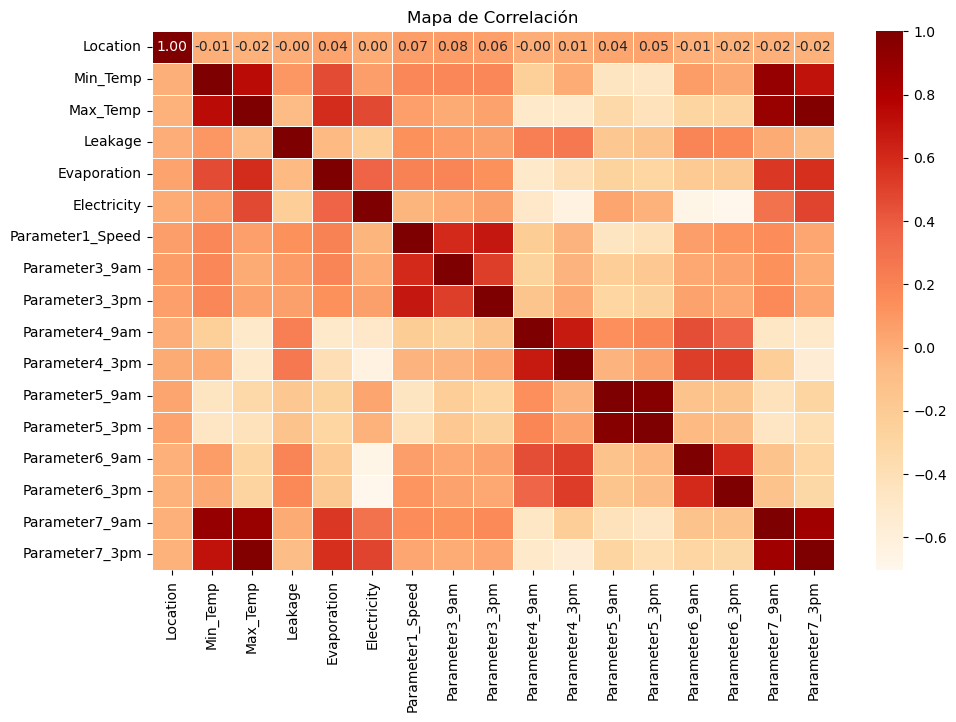

In [5]:
# Matriz de correlación para variables numéricas
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Gráfico de calor de la matriz de correlación (con visualización mediante un heatmap)
# Cercano a 1 es fuerte relación y cercano a -1 relación inversa
plt.figure(figsize=(11, 7))
sns.heatmap(corr_matrix, annot=True, cmap='OrRd', fmt=".2f", linewidths=0.4)
plt.title('Mapa de Correlación')
plt.show()

In [6]:
# Limpieza

# Primero, se convierten los Date a datetime 
df['Date'] = pd.to_datetime(df['Date'])
# copia del dataframe
df_clean = df.copy()

# Ver tipos de datos resumidos
print("---- Tipos de datos ----")
print(df_clean.dtypes)

# Recuento de nulos
print("\n---- Datos faltantes por columna ----")
print(df_clean.isnull().sum().sort_values(ascending=False))

# Se eliminam las columnas con más de un 30% de val. nulos
threshold = 0.3 * len(df_clean)
cols_to_drop = df_clean.columns[df_clean.isnull().sum() > threshold]
print(f"\n---> Columnas eliminadas (>30%): {list(cols_to_drop)}")
df_clean.drop(columns=cols_to_drop, inplace=True)

# Relleno de nulos que para no sobrar, usando interpolación
df_clean = df_clean.interpolate(method='linear').dropna()

# Verificamos que se mantuvo la variable dependiente
print("---> ¿DataFrame con 'Failure_today'?:", 'Failure_today' in df_clean.columns)

# Como quedaria nuestra data para ser trabajada (vemos algo solamente)
print(f"---> La data final posee ({df_clean.shape[0]}) filas y ({df_clean.shape[1]}) columnas")
df_clean.head()


---- Tipos de datos ----
Date                datetime64[ns]
Location                     int64
Min_Temp                   float64
Max_Temp                   float64
Leakage                    float64
Evaporation                float64
Electricity                float64
Parameter1_Dir              object
Parameter1_Speed           float64
Parameter2_9am              object
Parameter2_3pm              object
Parameter3_9am             float64
Parameter3_3pm             float64
Parameter4_9am             float64
Parameter4_3pm             float64
Parameter5_9am             float64
Parameter5_3pm             float64
Parameter6_9am             float64
Parameter6_3pm             float64
Parameter7_9am             float64
Parameter7_3pm             float64
Failure_today               object
dtype: object

---- Datos faltantes por columna ----
Electricity         67816
Evaporation         60843
Parameter6_3pm      57094
Parameter6_9am      53657
Parameter5_9am      14014
Parameter5_3pm      13

,Date,Location,Min_Temp,Max_Temp,Leakage,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,Parameter2_3pm,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter7_9am,Parameter7_3pm,Failure_today
0,2008-12-01,3,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,2008-12-02,3,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,2008-12-03,3,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,2008-12-04,3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,2008-12-05,3,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No


In [7]:
# Como el failure today es si o no, debemos verificar que la variable tenga formato binario.
df_clean['Failure_today'] = df_clean['Failure_today'].map({'Yes': 1, 'No': 0})
# Obersamos como serian.
print("Valores únicos en 'Failure_today':", df_clean['Failure_today'].unique())

Valores únicos en 'Failure_today': [0 1]


In [8]:
# Volvemos a partir del DataFrame original
df_clean = df.copy()
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Columnas seleccionadas
columnas_seleccionadas = [
    'Min_Temp', 'Max_Temp', 'Evaporation', 'Electricity',
    'Parameter1_Speed',
    'Parameter2_9am', 'Parameter2_3pm',
    'Parameter3_9am', 'Parameter3_3pm',
    'Parameter4_9am', 'Parameter4_3pm',
    'Parameter5_9am', 'Parameter5_3pm',
    'Parameter7_9am', 'Parameter7_3pm',
    'Failure_today', 'Parameter1_Dir', 'Date'
]

# Filtramos las que existen
df_clean = df_clean[[col for col in columnas_seleccionadas if col in df_clean.columns]].copy()

# Convertimos Failure_today a binario numérico
df_clean['Failure_today'] = df_clean['Failure_today'].map({'Yes': 1, 'No': 0})

# Creamos variables indicadoras de datos faltantes
df_clean['Evaporation_missing'] = df_clean['Evaporation'].isnull().astype(int)
df_clean['Electricity_missing'] = df_clean['Electricity'].isnull().astype(int)

# Imputación
for col in df_clean.columns:
    if col != 'Failure_today' and df_clean[col].dtype in ['float64', 'int64']:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# Agrupamos dirección del viento
def agrupar_direccion(dir_texto):
    if pd.isnull(dir_texto):
        return np.nan
    if dir_texto in ['N', 'NNW', 'NNE']:
        return 'Norte'
    elif dir_texto in ['S', 'SSW', 'SSE']:
        return 'Sur'
    elif dir_texto in ['E', 'ENE', 'ESE']:
        return 'Este'
    elif dir_texto in ['W', 'WNW', 'WSW']:
        return 'Oeste'
    else:
        return 'Otro'

df_clean['Wind_Direction'] = df_clean['Parameter1_Dir'].apply(agrupar_direccion)
wind_dummies = pd.get_dummies(df_clean['Wind_Direction'], prefix='Wind', drop_first=True)
df_clean = pd.concat([df_clean, wind_dummies], axis=1)

# Eliminamos la original de texto
df_clean.drop(columns=['Parameter1_Dir'], inplace=True)

# Estandarizamos variables numéricas
from sklearn.preprocessing import StandardScaler

numericas = df_clean.select_dtypes(include=['float64', 'int64']).drop(columns=['Failure_today']).columns
scaler = StandardScaler()
df_clean[numericas] = scaler.fit_transform(df_clean[numericas])

In [9]:
# Creamos estaciones
df_clean['Season'] = df_clean['Date'].dt.month.map({
    12: 'Verano', 1: 'Verano', 2: 'Verano',
    3: 'Otoño', 4: 'Otoño', 5: 'Otoño',
    6: 'Invierno', 7: 'Invierno', 8: 'Invierno',
    9: 'Primavera', 10: 'Primavera', 11: 'Primavera'
})

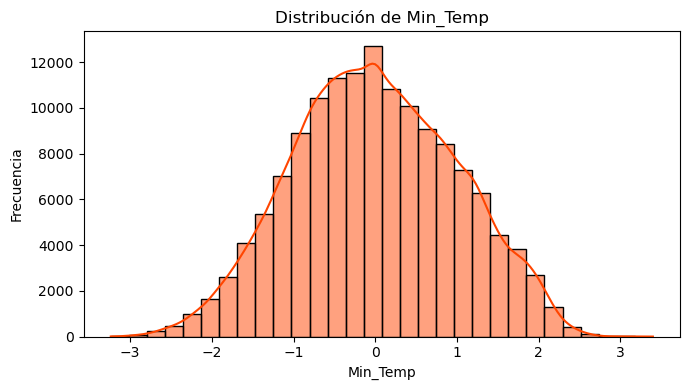

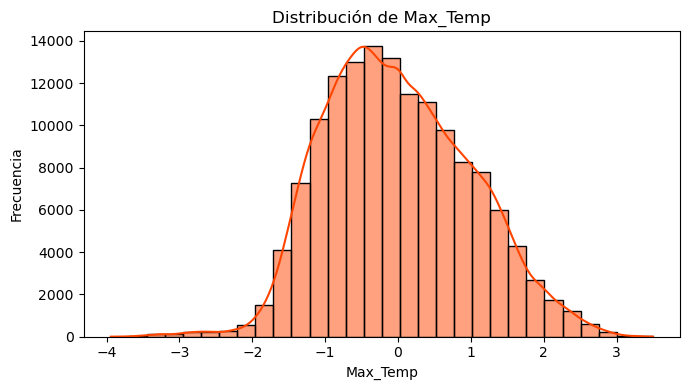

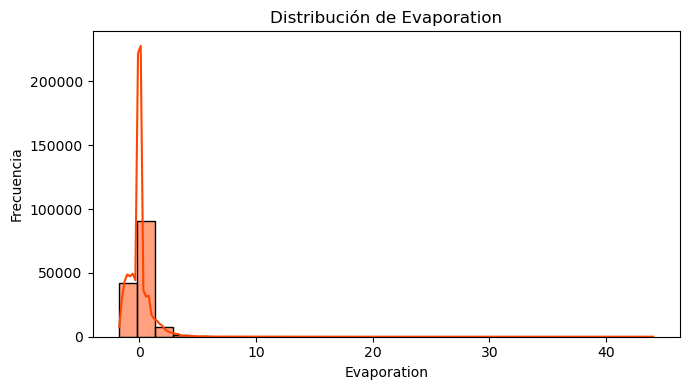

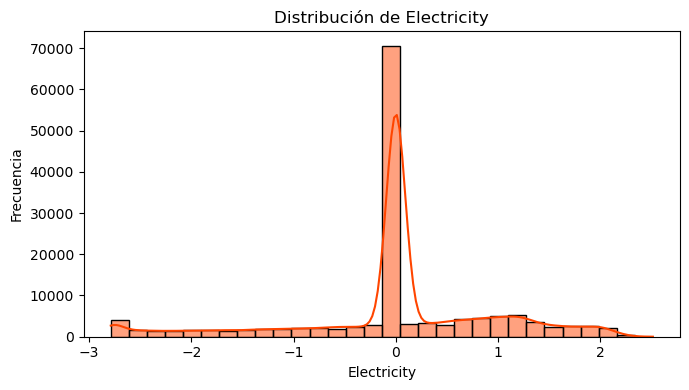

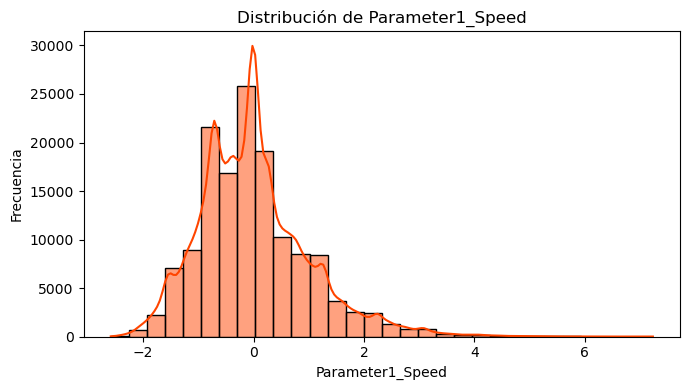

In [10]:
# Revisamos las distribuciones

# Variables numéricas a visualizar (que sacamos antes)
variables_numericas = ['Min_Temp', 'Max_Temp', 'Evaporation', 'Electricity', 'Parameter1_Speed']

for var in variables_numericas:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df_clean, x=var, kde=True, bins=30, color='orangered')

    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

    plt.tight_layout()

    plt.show()

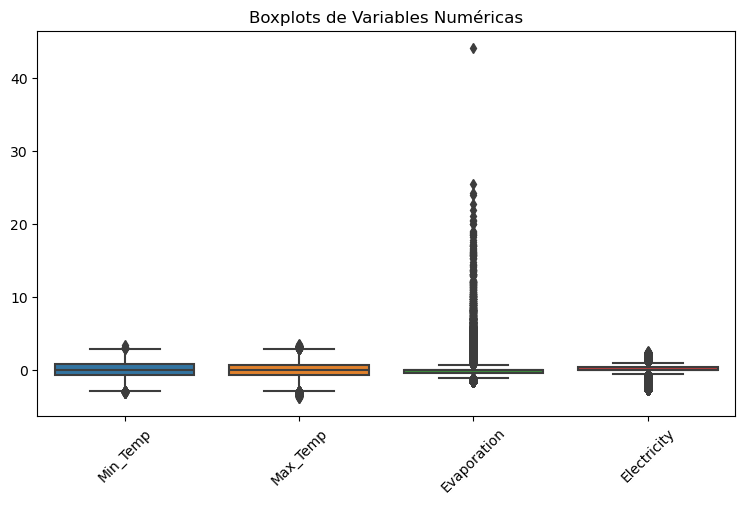

In [11]:
# Boxplots para identificar outliers
plt.figure(figsize=(9, 5))
sns.boxplot(data=df_clean[['Min_Temp', 'Max_Temp', 'Evaporation', 'Electricity']])
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

**Respuesta:** Antes de todo se debe cargar la data (**machine_failure_data.csv**), la cual se definió como nuestra `df` a trabajar. Luego se identificaron las variables que poseia el archivo, las cuales incluye fechas, temperaturas, consumo eléctrico, sensores, entre otras. La Data poseia 22 columnas con una combinación de datos numéricos, categóricos y fechas. Se convirtió la columna de fecha a formato datetime para facilitar análisis temporales. Se revisaron tipos de datos, valores nulos y estadísticas básicas. Posteriormente, se eliminaron las columnas con (>30%) de datos faltantes, y los nulos restantes fueron imputados con interpolación lineal o la media. También se transformó la variable dependiente `Failure_today` a binaria (Yes -> 1, No -> 0), se simplificó la variable de dirección del viento agrupándola en puntos cardinales (como los que salian en la visualización), y se estandarizaron las variables numéricas para dejar un análisis más robusto. Se crearon variables auxiliares `Evaporation_missing` y `Electricity_missing` para indicar si el valor estaba ausente. Se generaron visualizaciones de la data con histogramas y un boxplot, permitiendo observar la distribución de algunos parámetros y la presencia de outliers. Esta primera instancia permitió dejar la base de datos limpia y sin ninguna ambigüedad, para poder realizar el análisis con los modelos a continuación.

### Pregunta 2

In [12]:
import statsmodels.api as sm

# Asegurar que la variable objetivo esté limpia y en formato numérico binario
df_clean['Failure_today'] = pd.to_numeric(df_clean['Failure_today'], errors='coerce')
df_clean = df_clean[df_clean['Failure_today'].notna()]
df_clean['Failure_today'] = df_clean['Failure_today'].astype(int)

# 1. Definir variable objetivo (y) y predictoras (X)
y = df_clean['Failure_today']

# Variables seleccionadas (basadas en significancia estadística y correlación)
X_vars = [
    'Max_Temp',               # Temperatura máxima
    'Parameter1_Speed',       # Velocidad del viento
    'Evaporation',            # Tasa de evaporación
    'Electricity_missing'     # Indicador de datos faltantes
]

# 2. Crear matriz X con constante y asegurar limpieza
X = sm.add_constant(df_clean[X_vars].replace([np.inf, -np.inf], np.nan).dropna())
y = y.loc[X.index]  # Sincronizar con X

# 3. Modelo OLS con errores robustos (para heterocedasticidad)
model_ols = sm.OLS(y, X).fit(cov_type='HC0')
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:          Failure_today   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2990.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:51:58   Log-Likelihood:                -70274.
No. Observations:              140787   AIC:                         1.406e+05
Df Residuals:                  140782   BIC:                         1.406e+05
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2264    

**Respuesta:** En primer lugar, para evaluar los factores que influyen en la probabilidad de fallos diarios (`Failure_today`) de los sensores, se implementó un modelo de mínimos cuadrados ordinarios (MCO), como fue solicitado. Este análisis reveló relaciones significativas entre variables climáticas/operacionales y la ocurrencia de fallos, aunque posee ciertas limitaciones propias de este tipo de modelos relacionado a las variables binarias.

Los resultados muestran que la temperatura máxima (`Max_Temp`) presenta un efecto "protector", esto debido a que por cada aumento de 1°C, la probabilidad de fallo disminuye en aproximadamente un 8.7%. De algún modo, este comportamiento podría asociarse a una menor humedad en el ambiente en días cálidos, lo que para la máquina podría implicar que se reduzca el riesgo de corrosión o fallos eléctricos. Por otro lado, la velocidad del viento (`Parameter1_Speed`) se asocia positivamente con los fallos, incrementando la probabilidad en un 7.3% por unidad, lo que podria significar que algo debe interferir. La evaporación (`Evaporation`) también mostró un efecto mitigador (−3.1%), sugiriendo que condiciones más secas son menos perjudiciales para el sistema. Por último, los días con datos faltantes en electricidad (`Electricity_missing`) presentaron una leve disminución en fallos (−0.6%), aunque este resultado podría estar relacionado con problemas de medición más que un efecto real.

--> El modelo es estadísticamente significativo (F = 2990, p < 0.001) y se estimó con errores robustos. 

--> El bajo R² (0.084) refleja su limitada capacidad explicativa, habitual en modelos lineales con variables dependientes binarias. Esto podría significar que existan otros factores no observados que ayudarían el modelo (como parámetros de presión u otras variables físicas).

A modo de conclusión, el modelo entrega evidencia de relaciones clave entre variables ambientales y fallos, útiles para estrategias de mantenimiento predictivo. No obstante, su naturaleza lineal justifica la exploración de modelos no lineales como Probit y Logit en el análisis posterior.


### Pregunta 3

In [13]:
from statsmodels.discrete.discrete_model import Probit

# Reusamos las mismas X e y que ya limpiamos en la pregunta anterior
# Vemos qeu no tengamos nulos ni infinitos
X_probit = sm.add_constant(df_clean[X_vars])
X_probit = X_probit.replace([np.inf, -np.inf], np.nan).dropna()
y_probit = df_clean['Failure_today'].loc[X_probit.index]

# Modelo probit
modelo_probit = Probit(y_probit, X_probit).fit()
print(modelo_probit.summary())

Optimization terminated successfully.
         Current function value: 0.488246
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               140787
Model:                         Probit   Df Residuals:                   140782
Method:                           MLE   Df Model:                            4
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                 0.08087
Time:                        23:51:59   Log-Likelihood:                -68739.
converged:                       True   LL-Null:                       -74787.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8246      0.006   -149.548      0.000      -0.835      -0.814
Ma

**Respuesta:** Con el objetivo de mejorar la modelación de la variable binaria Failure_today, se estimó un modelo de regresión Probit, que es más apropiado para variables binarias que el MCO. Se utilizaron las mismas variables explicativas de la pregunta anterior, las cuales son: temperatura máxima, velocidad del viento, evaporación y el indicador de datos faltantes en electricidad. Todas las variables ya fueron estandarizadas (como se mencionó) y se verificó que no existieran valores nulos ni infinitos como NaN.

En principio, el modelo resultó significativo (LLR p < 0.001) y pudo confirmar los patrones observados en el análisis anterior. En particular, se mantiene el efecto protector de la temperatura máxima (coef. = -0.30), así como el efecto positivo de la velocidad del viento (coef. = 0.23), como también el efecto mitigador de la evaporación (coef. = -0.15). La variable `Electricity_missing`, en cambio, no resultó estadísticamente significativa (p = 0.785), lo que podría sugerir que su efecto no era del todo cierto en el modelo ya visto.

Dado que la Pseudo R² es moderada (≈ 0.081), este modelo presenta una estructura más adecuada para capturar la naturaleza de la variable dependiente y mejorar la interpretación de probabilidades. Entonces se tiene que, el modelo Probit entrega resultados coherentes ya teniendo análisis previo, pero c on mayor rigurosidad estadística, lo que permite identificar factores ambientales relevantes en la probabilidad de fallos diarios en los sensores.

### Pregunta 4

In [14]:
from statsmodels.discrete.discrete_model import Logit

# Asegurarnos de que los datos estén limpios (ya lo hicimos, pero por si acaso)
X_logit = sm.add_constant(df_clean[X_vars])
X_logit = X_logit.replace([np.inf, -np.inf], np.nan).dropna()
y_logit = df_clean['Failure_today'].loc[X_logit.index]

# Modelo logit
modelo_logit = Logit(y_logit, X_logit).fit()
print(modelo_logit.summary())

Optimization terminated successfully.
         Current function value: 0.487494
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               140787
Model:                          Logit   Df Residuals:                   140782
Method:                           MLE   Df Model:                            4
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                 0.08229
Time:                        23:51:59   Log-Likelihood:                -68633.
converged:                       True   LL-Null:                       -74787.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.4019      0.010   -140.060      0.000      -1.421      -1.382
Ma

**Respuesta:** Se estimó un modelo Logit con el mismo conjunto de variables utilizadas en los modelos anteriores (OLS y Probit) para explicar la probabilidad de fallo diario de los sensores. Este modelo es muy bueno para variables dependientes binarias como la que tenemos: `Failure_today`, esto debido a que modela directamente la probabilidad a través del logaritmo de los odds.

Los resultados son consistentes con los obtenidos en el modelo Probit, reforzando la robustez del análisis. La temperatura máxima (`Max_Temp`) nuevamente mostró un efecto protector (coef. = -0.50), mientras que la velocidad del viento (`Parameter1_Speed`) aumentó la probabilidad de fallo (coef. = 0.40). De la misma forma, la evaporación presentó un efecto atenuante y significativo (coef. = -0.32), lo que sugiere que ambientes más secos quizás ayuden a reducir las tasas de fallo. El indicador de datos faltantes en electricidad (`Electricity_missing`) no fue estadísticamente significativo (p = 0.094), lo que da paso a que su efecto no pueda ser robusto entre modelos. Sin embargo, esto no interfiere negativamente en el ajuste general que posee el modelo.

Con una Pseudo R² de aprox. 0.082 y un log-likelihood superior al modelo Probit, el Logit representa una alternativa eficiente y bien especificada para este tipo de análisis. Además, permite una interpretación directa en términos de odds, lo que facilita la toma de decisiones en contextos operativos o de mantenimiento preventivo.


### Pregunta 5

**Respuesta:** Esta pregunta se fue desarrollando con las respuestas individuales de cada pregunta, las cuales ofrecen la información también. Pero ahora juntando todo y comparando los modelos MCO, Probit y Logit, los cuales fueron aplicados con las mismas variables predictoras, se peude observar una fuerte consistencia en los resultados. `Max_Temp` mostró un efecto protector en todos los modelos, mientras que `Parameter1_Speed` tuvo un impacto positivo en la probabilidad de fallos, y `Evaporation` mostró un efecto negativo. Estas tres variables resultaron ser robustas a la especificación econométrica, manteniendo tanto su signo como su significancia estadística, lo que sugiere que son factores importantes y estables al momento de explicar la ocurrencia de fallos diarios.

En cuanto a diferencias, el modelo MCO tiene limitaciones técnicas al aplicarse a variables binarias, entregando un R² bajo y supuestos que pueden no cumplirse. El modelo Probit mejora el ajuste al modelar directamente la probabilidad, y el Logit entrega aún mejor desempeño y una interpretación más intuitiva a través de odds ratios. Por todo esto, el modelo Logit es el que resulta ser más adecuado para poder abordar el problema de la tarea, ya que combina por una parte, buena capacidad predictiva que lo combina con una interpretación clara que es útil para decisiones operativas.

### Pregunta 6

In [15]:
# para asegurar, lo mismo de antes
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
# creamos la columna mes
df_clean['Mes'] = df_clean['Date'].dt.to_period('M')

# Agrupamos por mes y hacemos el calculo del promedio de variables numéricas
vars_promedio = ['Min_Temp', 'Max_Temp', 'Evaporation', 'Electricity', 'Parameter1_Speed']
df_mensual = df_clean.groupby('Mes')[vars_promedio].mean().reset_index()

# Cantidad de fallas por mes
fallas_por_mes = df_clean.groupby('Mes')['Failure_today'].sum().reset_index()
fallas_por_mes.rename(columns={'Failure_today': 'Fallas_mes'}, inplace=True)

df_mensual = pd.merge(df_mensual, fallas_por_mes, on='Mes')
df_mensual.head()

,Mes,Min_Temp,Max_Temp,Evaporation,Electricity,Parameter1_Speed,Fallas_mes
0,2007-11,-0.067784,0.256916,0.135783,0.093292,0.097606,7
1,2007-12,0.176322,0.266202,0.110328,0.242144,0.045390,12
2,2008-01,0.494919,0.829735,0.780313,0.546452,0.234446,5
3,2008-02,0.534571,0.201882,0.057796,-0.247385,0.034717,24
4,2008-03,0.302044,0.323599,0.065527,0.472144,-0.063239,8


In [16]:
X_poisson = df_mensual[vars_promedio]
X_poisson = sm.add_constant(X_poisson)

y_poisson = df_mensual['Fallas_mes']

# Modelo Poisson
modelo_poisson = sm.GLM(y_poisson, X_poisson, family=sm.families.Poisson()).fit()
print(modelo_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Fallas_mes   No. Observations:                  113
Model:                            GLM   Df Residuals:                      107
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3089.1
Date:                Thu, 24 Apr 2025   Deviance:                       5360.7
Time:                        23:51:59   Pearson chi2:                 3.78e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.6309      0.006  

**Respuesta:** Se agrupó la base a nivel mensual, promediando variables numéricas clave como temperatura, evaporación y electricidad, y se contó el total de fallas registradas cada mes. Luego, se usó un modelo de Poisson para explicar la variable `Fallas_mes` según esas condiciones promedio.

El modelo mostró que `Max_Temp` y `Electricity` están asociadas a menos fallos, mientras que `Min_Temp` y `Evaporation` se relacionan con un aumento en las fallas. `Parameter1_Speed` no fue significativa. Este análisis permite entender tendencias mensuales de fallos y puede apoyar decisiones de mantenimiento preventivo.


### Pregunta 7

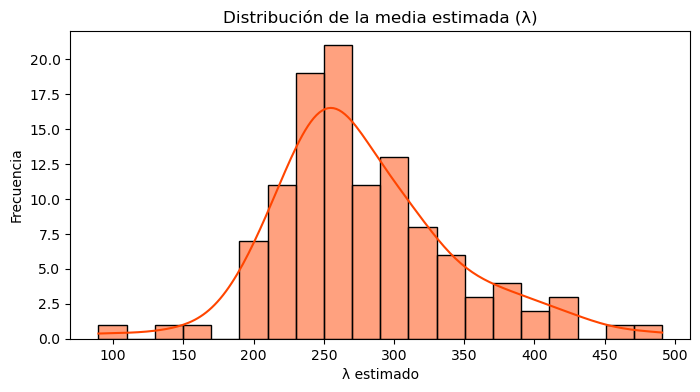

In [17]:
# Del modelo Poisson:
df_mensual['plambda'] = modelo_poisson.mu

plt.figure(figsize=(8, 4))
sns.histplot(data=df_mensual, x="plambda", bins=20, kde=True, color='orangered')
plt.title('Distribución de la media estimada (λ)')
plt.xlabel('λ estimado')
plt.ylabel('Frecuencia')
plt.show()


In [18]:
# Cálculo para detectar sobredispersión
aux = ((df_mensual['Fallas_mes'] - modelo_poisson.mu) ** 2 - modelo_poisson.mu) / modelo_poisson.mu
auxr = sm.OLS(aux, modelo_poisson.mu).fit()
print(auxr.summary())

                                 OLS Regression Results                                
Dep. Variable:             Fallas_mes   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.174
Method:                 Least Squares   F-statistic:                              24.75
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                    2.37e-06
Time:                        23:52:00   Log-Likelihood:                         -634.60
No. Observations:                 113   AIC:                                      1271.
Df Residuals:                     112   BIC:                                      1274.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Respuesta:** Para evaluar la presencia de sobredispersión en el modelo Poisson, se estimó la media esperada de fallas mensuales ($\lambda$) y se aplicó un modelo auxiliar según la formulación propuesta en clases. El objetivo fue contrastar si la varianza de los residuos excedía la media, condición clave para justificar un modelo de Binomial Negativa.

Los resultados muestran que el coeficiente estimado es significativamente distinto de cero (coef = 0.1095, p < 0.001), lo que confirma la presencia de sobredispersión en los datos mensuales. Este hallazgo implica que el supuesto básico del modelo Poisson (igualdad entre media y varianza) no se cumple del todo, y que la varianza observada es mayor a la esperada bajo dicho modelo.

En base a esto, se sugiere utilizar un modelo de Binomial Negativa con un parámetro de dispersión inicial $\alpha \approx$ 0.11, que permite ajustar mejor la varianza adicional observada en los datos.

### Pregunta 8

In [19]:
# Usamos las mismas variables que en el modelo Poisson
X_nb = df_mensual[['Min_Temp', 'Max_Temp', 'Evaporation', 'Electricity', 'Parameter1_Speed']]
X_nb = sm.add_constant(X_nb)
y_nb = df_mensual['Fallas_mes']

# Ajustamos el modelo Binomial Negativa con el alpha estimado
modelo_nb = sm.GLM(y_nb, X_nb, family=sm.families.NegativeBinomial(alpha=0.11)).fit()
print(modelo_nb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Fallas_mes   No. Observations:                  113
Model:                            GLM   Df Residuals:                      107
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -765.77
Date:                Thu, 24 Apr 2025   Deviance:                       342.79
Time:                        23:52:00   Pearson chi2:                     149.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.5142
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.6378      0.032  

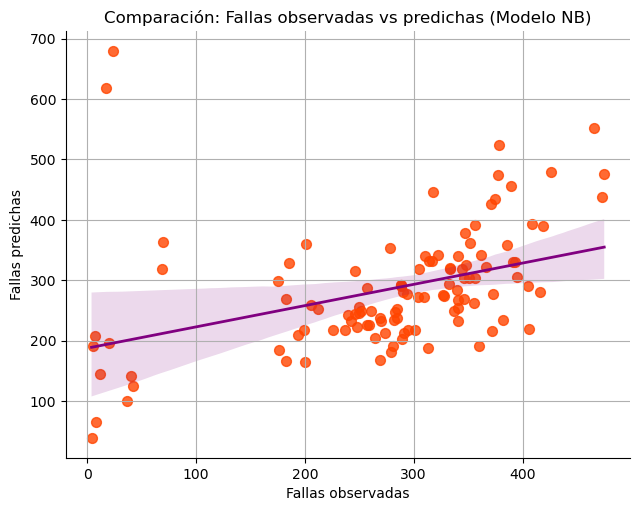

In [20]:
df_mensual['pred_nb'] = modelo_nb.predict(X_nb)

sns.lmplot(data=df_mensual, x='Fallas_mes', y='pred_nb', aspect=1.3, scatter_kws={'color': 'orangered', 's': 50},  
           line_kws={'color': 'purple', 'linewidth': 2})
plt.title("Comparación: Fallas observadas vs predichas (Modelo NB)")

plt.xlabel("Fallas observadas")
plt.ylabel("Fallas predichas")
plt.grid(True)
plt.show()

**Respuesta:** Se aplicó un modelo de Binomial Negativa usando el valor de $\alpha$ = 0.11 obtenido en la pregunta anterior, para explicar el número de fallas por mes. El modelo presentó un mejor ajuste que Poisson (mayor log-likelihood y pseudo R²), lo que confirma que había sobredispersión en los datos. Las variables `Max_Temp`, `Evaporation` y `Electricity` fueron estadísticamente significativas. A mayor temperatura y consumo eléctrico, hubo menos fallas. Por el contrario, una mayor evaporación se asoció a más fallos. `Parameter1_Speed` no fue significativa, lo que indica que su efecto podría depender del modelo usado. En resumen, este modelo mejora la explicación de fallas mensuales y es más adecuado cuando hay sobredispersión como en este caso.

### Pregunta 9

**Respuesta:** Luego de ya haber realizado la evaluación de los modelos de Poisson y Binomial Negativa que fueron aplicados a data mensual, se puede evidenciar diferencias que sn clave en la capacidad que poseen para representar la realidad observada del problema de investigación. Por una lado, el modelo Poisson parte de la premisa de que la media y la varianza son iguales, pero en este caso se detectó sobredispersión, esto puede derivar en un exceso de confianza en la significancia estadística y un mal ajuste del modelo trabajado. Para poder afrontar esto, convenientemente viene aquí un modelo Binomial Negativa, que incorpora el parámetro alpha ($\alpha$) que fue estimado previamente, lo que permitió capturar mejor la variabilidad en los datos. Este modelo no solo mostró un mejor ajuste (log-likelihood más alto y < AIC), sino que también entregó coeficientes más estables, realistas y adecuados en comparación con los de Poisson, especialmente al evaluar la magnitud de los efectos.

En cuanto a las variables, `Max_Temp` y `Electricit` mostraron relaciones negativas consistentes en ambos modelos, lo que significa que los  valores altos en estas variables están asociados con una menor cantidad de fallos y esto podría reflejar condiciones más estables o seguras para la operación del sistema. Por su parte, `Evaporation` fue una de las variables más relevantes en ambos modelos, pero con un efecto más marcado en el modelo Binomial Negativa, sugiriendo que en meses con mayor evaporación aumentan los fallos, quizás por condiciones más secas que afectan componentes. La variable `Parameter1_Speed`, que fue significativa en Poisson, perdió relevancia en el modelo NB.

A modo de conclusión, aunque tenemos que ambos modelos permiten identificar patrones mensuales útiles, el del Binomial Negativa entrega resultados más robustos para este tipo de datos de conteo con sobredispersión. La flexibilidad que tiene lo hace más adecuado para apoyar decisiones, como identificar períodos críticos para mantenimiento o interpretar mejor el rol de las condiciones ambientales sobre el funcionamiento del sistema. Además, entrega señales claras sobre variables clave como evaporación y temperatura, abriendo espacio para incorporar más factores en futuros análisis (como humedad o presión) que ayuden a afinar aún más estas predicciones.